In [17]:
%matplotlib inline

import os
import glob

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')
plt.style.use('/pbs/home/p/pcorrea/tools/matplotlib_style_sans-serif.txt')

PLOT_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [26]:
SIM_SOFTWARE = 'ZHAireS'
SIM_TAG      = 'DC2.1rc2'
THRESH       = 100 # ADC counts
POL          = 'XY'
N_TEMPLATES  = 5
FILTER_TAG   = 'FILTERED'

LIB_FILE   = f'/sps/grand/pcorrea/nutrig/template/v2/lib/templates_{SIM_SOFTWARE}_{SIM_TAG}_{FILTER_TAG}_{POL}_THRESH_{THRESH}_{N_TEMPLATES}.npz'
PLOT_TITLE = f'Template selection {FILTER_TAG}, POL = {POL}, THRESH = {THRESH}'

PLOT_SUPTITLE = f'{SIM_SOFTWARE} {SIM_TAG}'

In [27]:
with np.load(LIB_FILE) as lib_file:
    templates = lib_file['templates']

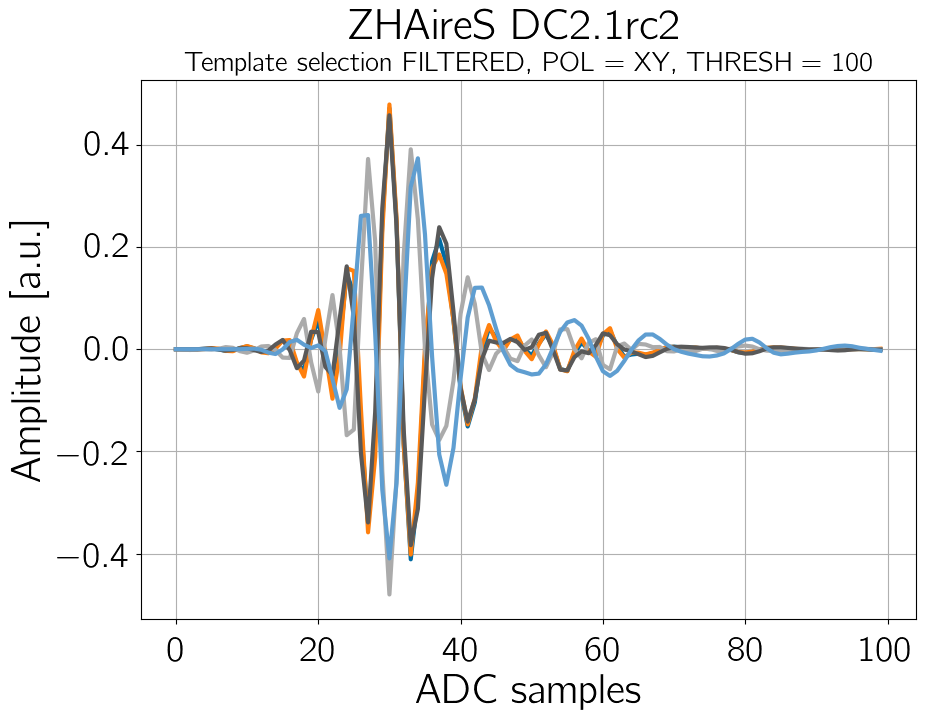

In [28]:
for template in templates:
    plt.plot(template)
plt.xlabel('ADC samples')
plt.ylabel('Amplitude [a.u.]')
plt.title(PLOT_TITLE,fontsize=20)
plt.suptitle(PLOT_SUPTITLE)
plt.show()

In [14]:
corr_grid = np.zeros((N_TEMPLATES,N_TEMPLATES))
for i in range(N_TEMPLATES):
    for j in range(N_TEMPLATES):
        corr_grid[i,j] = np.abs( np.correlate(templates[i],templates[j],mode='valid')[0] )

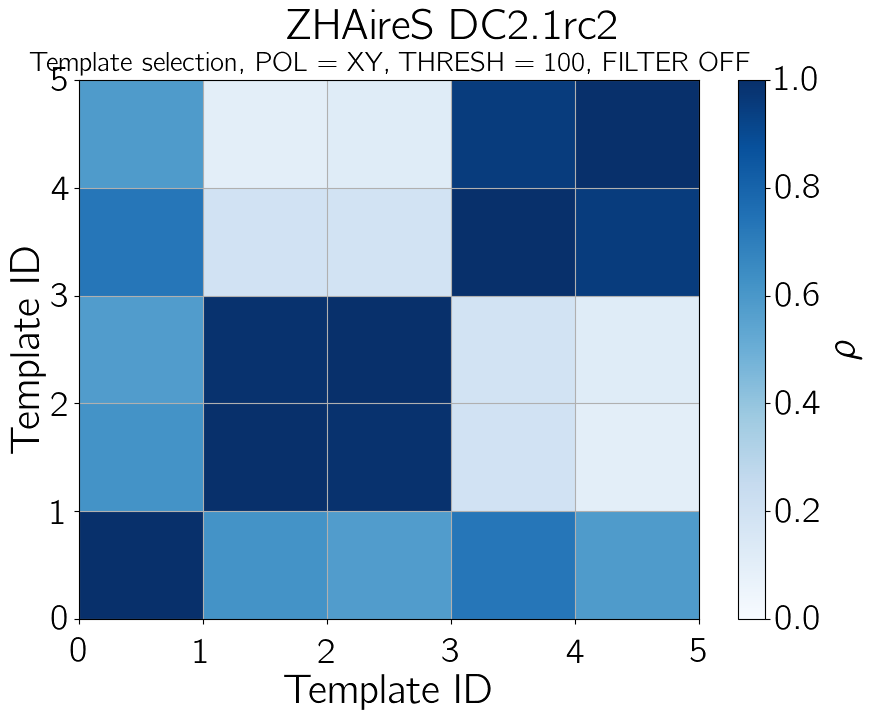

In [15]:
X, Y = np.meshgrid(np.arange(N_TEMPLATES + 1), np.arange(N_TEMPLATES + 1))
plt.pcolormesh(X, Y, corr_grid, cmap='Blues', vmin=0,vmax=1)
plt.colorbar(label=r'$\rho$')

plt.xlabel('Template ID')
plt.ylabel('Template ID')

plt.title(PLOT_TITLE,fontsize=20)
plt.suptitle(PLOT_SUPTITLE)

plt.show()

In [16]:
corr_grid

array([[1.        , 0.62009602, 0.57927148, 0.72784562, 0.58413199],
       [0.62009602, 1.        , 0.98973151, 0.19174947, 0.10498107],
       [0.57927148, 0.98973151, 1.        , 0.18968014, 0.11800227],
       [0.72784562, 0.19174947, 0.18968014, 1.        , 0.95085754],
       [0.58413199, 0.10498107, 0.11800227, 0.95085754, 1.        ]])